In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns

# Pressure Drawdown Testing and Application of Matthews-Brons-Hazebroek Technique:
### (L.P. Dake - Exercise 7.2 page 162 and Exercise 7.5 page 189)

A well is tested by producing it at a constant rate of 1500 stb/d for a period of 100 hours. It is suspected, from seismic and geological evidence, that the well is draining an isolated reservoir block which has approximately a 2:1 rectangular geometrical shape and the extended drawdown test is intended to confirm this. The reservoir data and flowing bottom hole pressures recorded during the test are detailed below:

h = 20 ft, c = 15 × 10-6 /psi,
rw = .33 ft, μo = 1 cp,
φ = .18, Bo = 1.20 rb/stb,

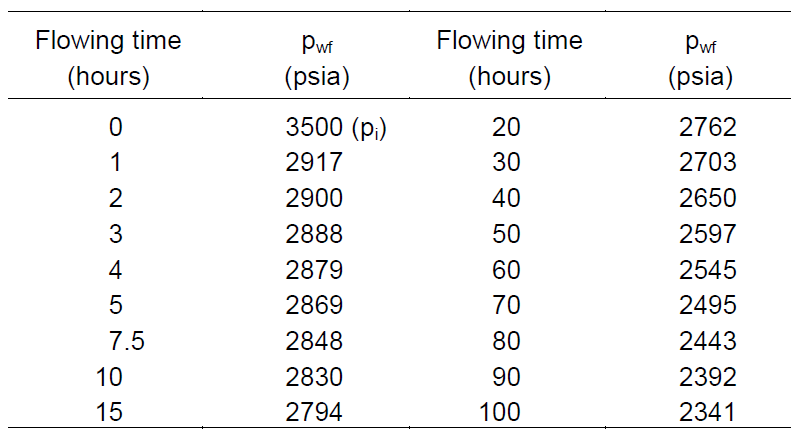


1) Calculate the effective permeability and skin factor of the well.

2) Make an estimate of the area being drained by the well and the Dietz shape factor.

In [2]:
# Resevoir Properties
q = 1500 #stb/d
tf = 100 #hrs
Pi = 3500 #psi
h = 20 #ft
c = 15 * 10**-6 #/psi
rw = .33 #ft
mu = 1 #cp
phi = .18
Bo = 1.20 #rb/stb

In [3]:
# Recorded bottomhole pressures
t= np.array([1,2,3,4,5,7.5,10,15,20,30,40,50,60,70,80,90,100])
Pwf = np.array([2917,2900,2888,2879,2869,2848,2830,2794,2762,2703,2650,2597,2545,2495,2443,2392,2341])
df = pd.DataFrame({'Flowing time, hrs (t)':t, 'Pwf, psi':Pwf})
df

,"Flowing time, hrs (t)","Pwf, psi"
0,1.0,2917
1,2.0,2900
2,3.0,2888
3,4.0,2879
4,5.0,2869
5,7.5,2848
6,10.0,2830
7,15.0,2794
8,20.0,2762
9,30.0,2703


#### 1.) k and S can be estimated from early transient region using equation for ei < .01:

$p_{wf}=p_i-\frac{qB_o\mu}{4\pi kh}(ln\frac{4kt}{\gamma \phi \mu cr_w^2}+2S)$ in Darcy Units

$p_{wf}=p_i-\frac{162.6qB_o\mu}{kh}(log_{10}\frac{kt}{\phi \mu cr_w^2}-3.23+.869S)$ in Field Units

If m is the slope in $P_{wf}$ vs t semi-log plot and $P_{wf(1 hr)}$ is the intercept (in Field Units),

$k=\frac{162.6qB_o\mu}{mh}$

$S=1.151(\frac{p_i-p_{wf(1 hr)}}{m}-log_{10}\frac{k}{\phi \mu cr_w^2}+3.23)$

 


#### 2.) A and $C_A$ can be estimated from later period using equations:

$\frac{dp}{dt}=-\frac{qB_o}{cAh\phi} (atm/s)$ in Darcy Units

$\frac{dp}{dt}=-\frac{.2339qB_o}{cAh\phi} (psi/hr)$ in Field Units

$p_i-p_{wf}=\frac{qB_o\mu}{4\pi kh}(\frac{1}{2}ln\frac{4A}{\gamma C_Ar_w^2}+2\pi\frac{kt}{\phi \mu cA}+2S)$ in Darcy Units

$p_i-p_o=m(log_{10}\frac{4A}{\gamma r_w^2}-log_{10}C_A+.869S)$ in Field Units

In [4]:
# optmizing the number of points that are to be taken for regression
r_square = []
for i in range(1,6):
    x = np.log10(t[:i])
    Pwf_ = Pwf[:i]
    slope, intercept, r_value, p_value, std_err = linregress(x, Pwf_)
    r_square.append(r_value)
r_square

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:184: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:187: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


[0.0, -1.0, -0.998708330563765, -0.9982702013334013, -0.994606979091829]

### In above array, considering till third element, 3 points is reasonable for regression. After this, Later Transient region starts.

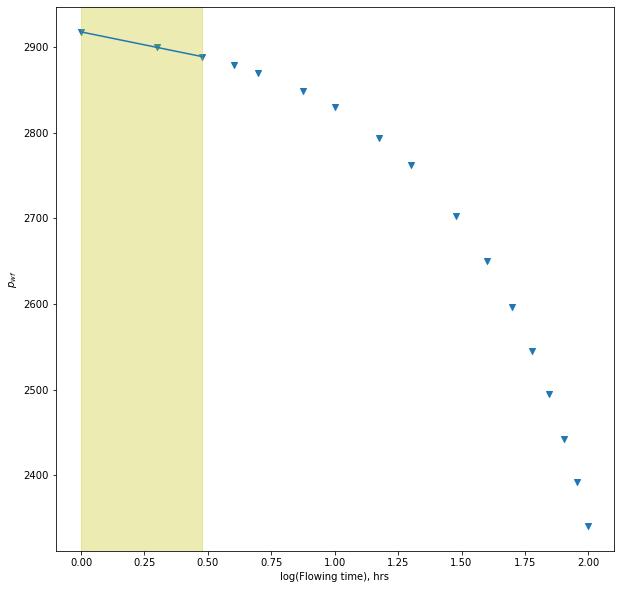

In [5]:
# Early Transient
plt.figure(figsize=(10,10))
plt.scatter(np.log10(t), Pwf, marker= 'v') #semilog plot
plt.xlabel('log(Flowing time), hrs')
plt.ylabel('$p_{wf}$')

x = np.log10(t[:3])
Pwf_ = Pwf[:3]
m, Pwf_1hr, r_value, p_value, std_err = linregress(x, Pwf_)
plt.plot(x, m*(x)+Pwf_1hr)
plt.axvspan(0,x[-1],alpha=0.3,color='y')
m=-m

In [6]:
m,Pwf_1hr

(60.31725580288526, 2917.311982674242)

In [7]:
k = 162.6*q*mu*Bo/m/h
k #md

242.6171384159686

In [8]:
S = 1.151*(((Pi-Pwf_1hr)/m)-np.log10(k/phi/mu/c/(rw**2))+3.23)
S #Skin


4.573909285172924

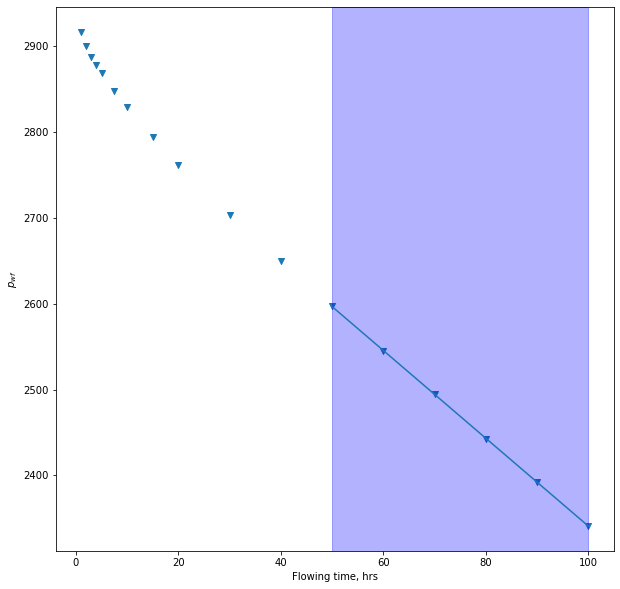

In [9]:
# Semi Steady State flow condition
plt.figure(figsize=(10,10))
plt.scatter(t, Pwf, marker= 'v')
plt.xlabel('Flowing time, hrs')
plt.ylabel('$p_{wf}$')

x = t[11:]
Pwf_ = Pwf[11:]
m2, Po, r_value, p_value, std_err = linregress(x, Pwf_)
plt.plot(x, m2*(x)+Po)
plt.axvspan(x[0],x[-1],alpha=0.3,color='b')

In [10]:
m2,Po

(-5.117142857142857, 2852.6190476190477)

In [11]:
A = -.2339*q*Bo/c/m2/h/phi
A/43560 #drainage area in acres

34.9778857215028

In [12]:
Ca = 10**(np.log10(4*A/1.781/(rw**2))+.869*S-(Pi-Po)/m)
Ca #Dietz Shape Factor

5.483346093526357

So, the estimated $C_A$ is approx equal to the suspected geometry as:

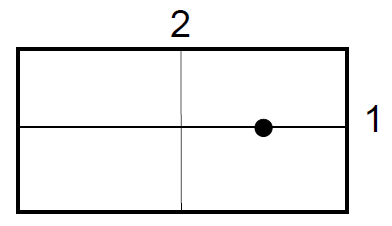

But, still there is some doubt regarding the drainage geometry and Well asymmetry, which can be resolved by using MBH (1954) Curves, according to the paper by Cobb and Dowdle (1973).

## MBH Method: Generation of Dimensionless Pressure Functions:

The analysis of the single rate drawdown test, exercise 7.2, indicated that the Dietz shape factor for the 35 acre drainage area had the value $C_A$ = 5.48. The tabulated values of $C_A$ presented in Dietz (1965) indicate that there are three geometrical configurations with shape factors in the range of 4.5 to 5.5 which are shown as below.

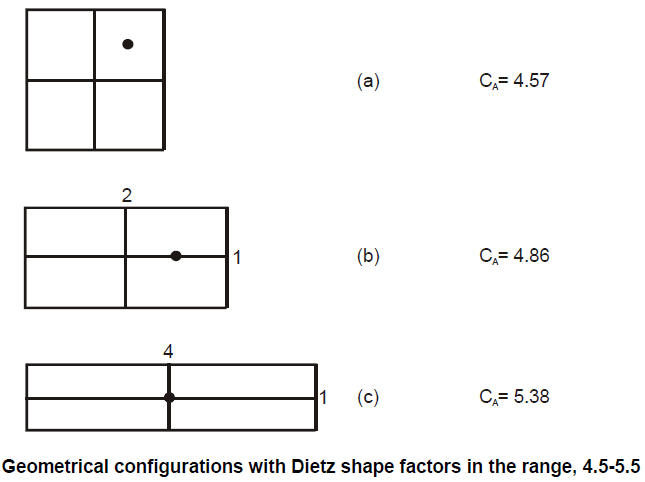

The geological evidence suggests that the 2 : 1 geometry, figure proposed in above calculations, is probably correct. Using the basic data and results of above exercise, confirm the geological interpretation by comparing the observed pressure decline, given table, with the theoretical decline calculated for the three geometries of above figure.

#### Constant Terminal Rate solution equation:

$\frac{2\pi kh}{q\mu B_o}(p_i-p_{wf})=p_D(t_D)+S$  in Darcy Units

$\frac{7.08x10^{-3} kh}{q\mu B_o}(p_i-p_{wf})=p_D(t_D)+S$  in Field Units

#### Using Cobb and Dowdle (1973) equation for any pressure regime with Dimensionless MBH Pressure:

$p_D(t_{DA})=2\pi t_{DA}+\frac{1}{2}lnt_{DA}+\frac{1}{2}ln\frac{4A}{\gamma r_w^2}-\frac{1}{2}p_{D(MBH)}(t_{DA})$

, which can be reduced to,

$\frac{7.08x10^{-3} kh}{q\mu B_o}(p_i-p_{wf})=a-\frac{1}{2}p_{D(MBH)}(t_{DA})$

in which constant $a$,

$a=2\pi t_{DA}+\frac{1}{2}lnt_{DA}+\frac{1}{2}ln\frac{4A}{\gamma r_w^2}+S$

#### $p_{D(MBH)}$ can be viewed form the MBH curves of particular $t_{DA}$ for particular geometry.

In [13]:
c1=7.08*(10**-3)*k*h/q/mu/Bo
c1

0.019085881555389535

In [14]:
# t_DA = c2*t = 0.000264*kt/phi mu cA

c2=0.000264*k/phi/mu/c/A
c2

0.015569698874758843

In [15]:
df = df[:12]
df.columns=['t, hrs', 'Observed Pwf, psi']
df

,"t, hrs","Observed Pwf, psi"
0,1.0,2917
1,2.0,2900
2,3.0,2888
3,4.0,2879
4,5.0,2869
5,7.5,2848
6,10.0,2830
7,15.0,2794
8,20.0,2762
9,30.0,2703


In [16]:
df['$t_{DA}$']=c2*df['t, hrs']
df['$a$']=2*np.pi*df['$t_{DA}$']+0.5*np.log(df['$t_{DA}$'])+0.5*np.log(4*A/1.781/(rw**2))+S
df

C:\Users\idris\AppData\Local\Temp\ipykernel_20024\2819418392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['$t_{DA}$']=c2*df['t, hrs']
C:\Users\idris\AppData\Local\Temp\ipykernel_20024\2819418392.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['$a$']=2*np.pi*df['$t_{DA}$']+0.5*np.log(df['$t_{DA}$'])+0.5*np.log(4*A/1.781/(rw**2))+S


,"t, hrs","Observed Pwf, psi",$t_{DA}$,$a$
0,1.0,2917,0.015570,11.222050
1,2.0,2900,0.031139,11.666451
2,3.0,2888,0.046709,11.967011
3,4.0,2879,0.062279,12.208679
4,5.0,2869,0.077848,12.418078
5,7.5,2848,0.116773,12.865379
6,10.0,2830,0.155697,13.253788
7,15.0,2794,0.233545,13.945657
8,20.0,2762,0.311394,14.578635
9,30.0,2703,0.467091,15.759640


In [17]:
# Cases a, b and c are shown figure above for different geometries.
# Case d is well draining from circular bounded area for comparison.
# P_D(MBH) is estimated from MBH curves for all four cases at each given t_DA.

df['$.5p_{D(MBH)a}$']=[.093,.151,.167,.163,.148,.117,.117,.158,.213,.387,.536,.643]
df['$.5p_{D(MBH)b}$']=[.093,.192,.267,.331,.357,.406,.429,.441,.450,.497,.589,.666]
df['$.5p_{D(MBH)c}$']=[.093,.146,.171,.180,.168,.168,.194,.253,.327,.481,.618,.729]
df['$.5p_{D(MBH)d}$']=[.093,.194,.285,.397,.474,.663,.809,1.008,1.152,1.357,1.501,1.602]

# estimating theoretical P_wf for different geometries

df['$p_{wfa}$']=Pi-(df['$a$']-df['$.5p_{D(MBH)a}$'])/c1
df['$p_{wfb}$']=Pi-(df['$a$']-df['$.5p_{D(MBH)b}$'])/c1
df['$p_{wfc}$']=Pi-(df['$a$']-df['$.5p_{D(MBH)c}$'])/c1
df['$p_{wfd}$']=Pi-(df['$a$']-df['$.5p_{D(MBH)d}$'])/c1

df

C:\Users\idris\AppData\Local\Temp\ipykernel_20024\1177830297.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['$.5p_{D(MBH)a}$']=[.093,.151,.167,.163,.148,.117,.117,.158,.213,.387,.536,.643]
C:\Users\idris\AppData\Local\Temp\ipykernel_20024\1177830297.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['$.5p_{D(MBH)b}$']=[.093,.192,.267,.331,.357,.406,.429,.441,.450,.497,.589,.666]
C:\Users\idris\AppData\Local\Temp\ipykernel_20024\1177830297.py:7: SettingWithCopyWarning: 
A value is trying to be se

,"t, hrs","Observed Pwf, psi",$t_{DA}$,$a$,$.5p_{D(MBH)a}$,$.5p_{D(MBH)b}$,$.5p_{D(MBH)c}$,$.5p_{D(MBH)d}$,$p_{wfa}$,$p_{wfb}$,$p_{wfc}$,$p_{wfd}$
0,1.0,2917,0.015570,11.222050,0.093,0.093,0.093,0.093,2916.896210,2916.896210,2916.896210,2916.896210
1,2.0,2900,0.031139,11.666451,0.151,0.192,0.146,0.194,2896.650831,2898.799016,2896.388858,2898.903806
2,3.0,2888,0.046709,11.967011,0.167,0.267,0.171,0.285,2881.741389,2886.980864,2881.950968,2887.923969
3,4.0,2879,0.062279,12.208679,0.163,0.331,0.180,0.397,2868.869657,2877.671975,2869.760368,2881.130029
4,5.0,2869,0.077848,12.418078,0.148,0.357,0.168,0.474,2857.112324,2868.062826,2858.160219,2874.193012
5,7.5,2848,0.116773,12.865379,0.117,0.406,0.168,0.663,2832.051872,2847.193955,2834.724004,2860.659406
6,10.0,2830,0.155697,13.253788,0.117,0.429,0.194,0.809,2811.701264,2828.048426,2815.735660,2847.958431
7,15.0,2794,0.233545,13.945657,0.158,0.441,0.253,1.008,2777.599141,2792.426856,2782.576643,2822.134679
8,20.0,2762,0.311394,14.578635,0.213,0.450,0.327,1.152,2747.316152,2759.733708,2753.289153,2796.514823
9,30.0,2703,0.467091,15.759640,0.387,0.497,0.481,1.357,2694.554346,2700.317768,2699.479452,2745.377253


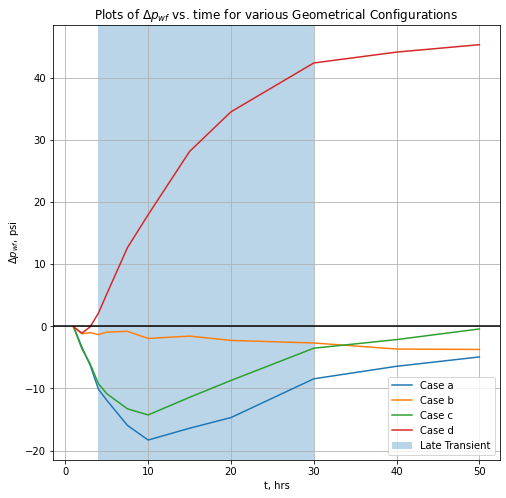

In [18]:
# plotting difference between observed and theoretical P_wf for different geometries to check deviations

plt.figure(figsize=(8,8))
sns.lineplot(x= df['t, hrs'], y= df['$p_{wfa}$']-df['Observed Pwf, psi'], label= 'Case a')
sns.lineplot(x= df['t, hrs'], y= df['$p_{wfb}$']-df['Observed Pwf, psi'], label= 'Case b')
sns.lineplot(x= df['t, hrs'], y= df['$p_{wfc}$']-df['Observed Pwf, psi'], label= 'Case c')
sns.lineplot(x= df['t, hrs'], y= df['$p_{wfd}$']-df['Observed Pwf, psi'], label= 'Case d')
plt.grid()
plt.ylabel('$\Delta p_{wf}$, psi')
plt.title('Plots of $\Delta p_{wf}$ vs. time for various Geometrical Configurations')
plt.axvspan(df['t, hrs'][3], df['t, hrs'][9], alpha= .3, label= 'Late Transient')
plt.axhline(0, color='k')

plt.legend()

### In the above plot, shaded portion shows Late Transient region, in which all cases, except 'b', are deviating from zero. So, finally, our assumed configuration approximately fits the PTA:

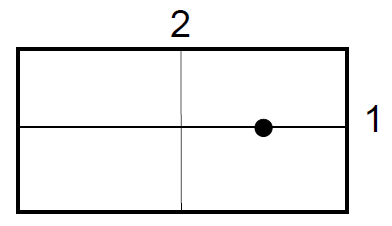